In [1]:
# 목표
# - 공부시간 + 수면시간으로 합격 여부 예측
# - SGD로 점진 학습
# - 에포크별 과소,과대적합 확인

In [2]:
# 1단계 : 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# 2단계 : 가짜 데이터 생성
np.random.seed(42) #랜덤고정(항상 같은 데이터 생성-> 재현성 확보)/실무에서는 사용하지 않음
# 공부시간(평균 5시간, 표준편차 2시간)
study_hours = np.random.normal(5,2,200)
# 수면시간(평균 7시간, 표준편차 1시간)
sleep_hours = np.random.normal(7,1,200)

# 특성 2개를 하나의 2차원 배열로 묶음
# shape = (200,2)
X = np.column_stack((study_hours,sleep_hours))

# 합격 여부 결정 (임의의 선형 경계 생성)
# 공부시간과 수면시간이 일정 기준 이상이면 합격(1)
y = (study_hours * 0.8 + sleep_hours * 0.5 > 6).astype(int)

# 앞부분 확인
print("X sample:\n", X[:5])
print("y sample:\n", y[:5])

X sample:
 [[5.99342831 7.35778736]
 [4.7234714  7.56078453]
 [6.29537708 8.08305124]
 [8.04605971 8.05380205]
 [4.53169325 5.62233063]]
y sample:
 [1 1 1 1 1]


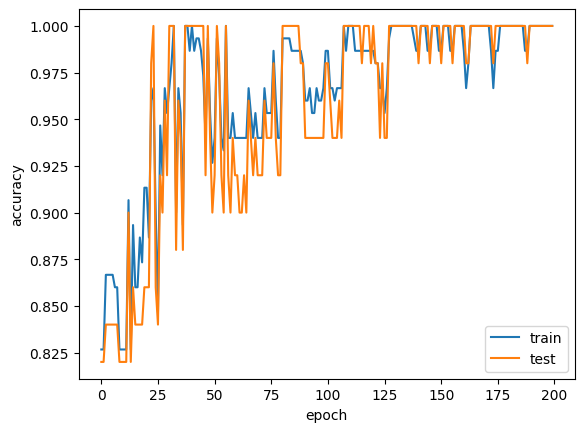

In [3]:
# 3단계 : 훈련 / 테스트 데이터 분리
# 데이터를 훈련용과 테스트용으로 나눔
# -> 모델이 암기하지 않고 일반화되는 지 확인하기 위함
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

# 4단계 : 데이터 표준화(중요!!)
# SGD는 경사 기반 알고리즘 -> 스케일에 민감함
# 평균 0, 표준편차 1로 변환

scaler = StandardScaler()

# 훈련 세트로 평균과 표준편차 계산
X_train_s = scaler.fit_transform(X_train)

# 테스트 세트는 변환만 수행(fit안함)
X_test_s = scaler.transform(X_test)

# 5단계 : SGD 모델생성
# loss='log_loss'
# → 로지스틱 회귀 방식
# → 확률 기반 분류

sgd = SGDClassifier(
    loss ='log_loss',
    random_state = 42,
)

# partial_fit을 사용하려면 클래스 정보 필요
classes = np.unique(y_train)

# 6단계 : 에포크별 학습 (점진적 학습)
train_scores = []
test_scores = []

# 200번 반복 = 200에포크
for epoch in range(200):

    # 한 번의 에포크 학습
    sgd.partial_fit(X_train, y_train, classes=classes)

    # 현재 에포크의 정확도 저장
    train_scores.append(sgd.score(X_train, y_train))
    test_scores.append(sgd.score(X_test, y_test))

# 7단계 : 결과 시각화
plt.plot(train_scores, label='train')
plt.plot(test_scores, label='test')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [5]:
# 8단계 : 최적 에포크 찾기
best_epoch = np.argmax(test_scores) + 1
best_accuracy = max(test_scores)

print("최적 에포크:", best_epoch)
print("최고 테스트 정확도:", best_accuracy)

최적 에포크: 24
최고 테스트 정확도: 1.0


In [ ]:
# 왜 StandardScaler를 쓰는가?
# -- SGD는 기울기 기반으로 값 크기 차이가 크면 학습이 불안정해진다.

# 왜 partial_fit을 쓰는가?
# -- 에포크를 직접제어하고 점진 학습 실험하기 위해서 사용한다.

# train/test를 왜 같이 보는가?
# -- train ↑ test ↓ → 과대적합|둘 다 낮음 → 과소적합(90%이내가 가장 좋음)

# np.unique(classes) 왜 필요한가?
# -- partial_fit은 처음 호출 시 '전체 클래스 목록'을 알아야 한다.

# np.argmax(test_scores) 의미
# -- 테스트 정확도가 가장 높은 에포크 위치를 찾기 위해